<a href="https://colab.research.google.com/github/Aymericrag/Projet---Accidents/blob/main/Projet_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projet Accident**

A chaque lancement de collab n'oubliez pas de re-importer les données. Les 5 fichiers CSV, dans le dossier *file* (quatrième icone à gauche)

# Ouverture des données


Import de toutes les librairies nécessaires

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

In [ ]:
# Data Viz CAC sur caracteristics

import pandas as pd
import numpy as np


#Chargement du fichier caractéristics

df = pd.read_csv('C:/Users/CAC/Desktop/Formation DS/Projet Accident/caracteristics3.csv', sep = ';', encoding='ISO-8859-1', low_memory=False)


#Suppression des variables non utiles (adresse trop peu utlisable et gps car corrigée avec gps_cor)

df = df.drop(columns =['adr','gps'])
df

FileNotFoundError: ignored

NameError: ignored

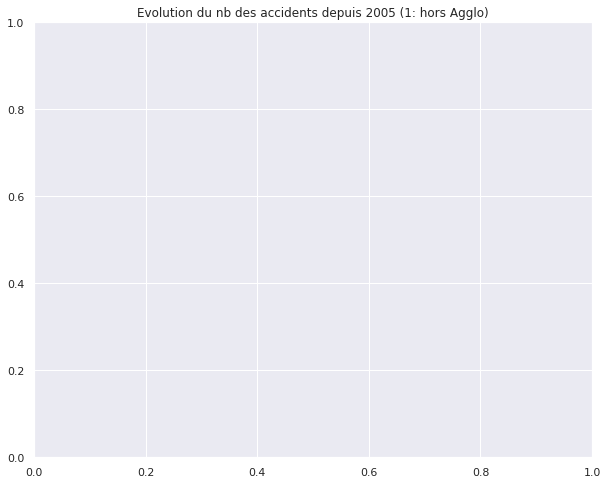

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

plt.figure(figsize = (10,8))
plt.title('Evolution du nb des accidents depuis 2005 (1: hors Agglo)')
sns.countplot(x='an', color = 'r', data = df);
sns.countplot(x='an', hue = 'agg', data = df);

print("Le nb d'accident est globalement en constante diminution depuis 2005")
print("Cependant les accidents hors agglomération sont en augmentation depuis 2012/2013")

In [ ]:
# Visualisation par localisation

plt.figure(figsize = (10,8))
plt.title('Accident par Localisation (M: Metropole)')
df.gps_cor.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("97% du dataset sont localisé en Metropole")

In [ ]:
# Analyse sur la situation atmosphérique et les accidents
# Creation d'une colonne pour temps accidentogene (beau vs nuageux, pluvieux, neigeux etc)

df['atm_risk']= df['atm']

replace = df['atm_risk'].value_counts().index.tolist()
new_cat = ['Normal&Other', 'A Risque','A Risque','A Risque','A Risque','Normal&Other','A Risque','A Risque','A Risque']

df['atm_risk']= df['atm_risk'].replace(to_replace= replace, value = new_cat)

plt.figure(figsize = (10,8))
plt.title('Accident par conditions Atmosphériques')
df.atm_risk.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("18% des accidents se produisent avec un temps dégradés")

In [ ]:
# Voir la proportion en métrople
df_M = df[df['gps_cor'] =='M']

plt.figure(figsize = (10,8))
plt.title('Accident par conditions Atmosphériques en Metropole')
df_M.atm_risk.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("On observe qu'il y a peu de difference entre Metropole et tous les depts inclus")


In [ ]:
plt.figure(figsize = (10,8))
plt.title('Accident par conditions luminosité en Metropole')
df_M.lum.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("70 % des axccidents se passent en pleine journée")

In [ ]:
df_M['dep'] = df_M['dep']/10
top_dep = df_M['dep'].value_counts().head(20).rename_axis('dep').to_frame('counts')

top_dep_acc = top_dep.sum()
all_acc = df_M['dep'].count()
print('prop :', (top_dep_acc/all_acc)*100)
lt.figure(figsize = (10,10))
df_M['dep'].value_counts().head(95).plot(kind='bar');


In [ ]:
plt.figure(figsize = (10,10))
df_M['dep'].value_counts().head(20).plot(kind='bar');

In [ ]:
plt.figure(figsize = (10,10))
df_M['dep'].value_counts().tail(20).plot(kind='bar');


In [ ]:
# Accidents par mois selon mois agglo & hors agglo
plt.figure(figsize = (10,8))
plt.title('Accidents selon les mois (1: hors Agglo)')
sns.countplot(x='mois', color = 'r', data = df_M);
sns.countplot(x='mois', hue = 'agg', data = df_M);
print('moins d accidents en aout et en agglo: effet vacances en Ile de France')

In [ ]:
# Fichier places
import pandas as pd
import seaborn as sns
places=pd.read_csv("places.csv",low_memory=False)
places.head()
places.info()
places.describe()
#On supprime les variables qui ne sont pas utiles pour déterminer la gravité
to_drop=['voie','v1','v2','pr','pr1','env1']
places_2=places.drop(to_drop,axis=1)
sns.countplot(x=places_2['catr']);
sns.countplot(x=places_2['circ']);
sns.countplot(x=places_2['nbv']);
places_2['nbv'].unique()
#Valeurs aberrantes de nbv ?
sns.countplot(x=places_2['vosp']);
#Beaucoup de valeurs 0 non définies dans vosp
sns.countplot(x=places_2['prof']);
sns.countplot(x=places_2['plan']);
sns.countplot(x=places_2['lartpc']);
places_2['lartpc'].unique()
#Valeurs aberrantes de lartpc ?
sns.countplot(x=places_2['larrout']);
places_2['larrout'].unique()
#Valeurs aberrantes de larrout ?
sns.countplot(x=places_2['surf']);
sns.countplot(x=places_2['infra']);
#Beaucoup de valeurs 0 non définies dans infra
sns.countplot(x=places_2['situ']);



# Exploration + DataViz
Inclut les premières opérations de pre-processing. Ne pas oublier les commentaires expliquant les opérations


In [ ]:
# Fichier places
#on supprime vosp et infra car une trés grande majorité de valeur 0 non définies)
to_drop=['vosp','infra']
places_3=places_2.drop(to_drop,axis=1)
# Il reste 9 variables ('Num_Acc','catr','circ','nbv','prof','plan','lartpc','larrout','surf','situ' 
places_3.info()
# On supprime les lignes où il y a des NaNs
places_3 = places_3.dropna()
# On fini avec 829132 lignes sur 839985 au départ

Aymeric : DataViz sur le fichier  Vehicules.csv



In [6]:
df = pd.read_csv('vehicles.csv')
df_new=df[df.catv.isin([7,33,2,30,10,1,32,31,5,14])]
cat = df_new['catv'].value_counts(normalize=True) 
cat

7     0.659235
33    0.071969
2     0.059157
10    0.051989
30    0.044371
1     0.043046
32    0.021917
31    0.020763
5     0.016155
14    0.011398
Name: catv, dtype: float64

PiePlot avec toutes les catégories

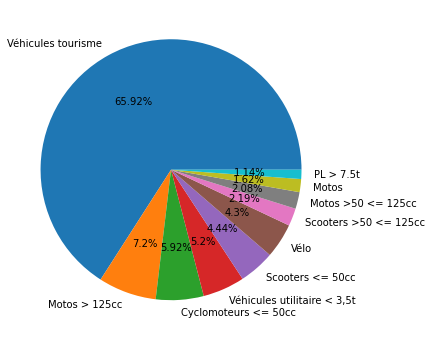

In [7]:
leg = ['Véhicules tourisme', 'Motos > 125cc', 'Cyclomoteurs <= 50cc', 'Véhicules utilitaire < 3,5t', 'Scooters <= 50cc', 'Vélo', 'Scooters >50 <= 125cc', 'Motos >50 <= 125cc', 'Motos', 'PL > 7.5t']
plt.figure(figsize=(6,6))
plt.pie(cat, labels=leg, autopct = lambda x: str(round(x,2)) + '%');

Regroupement des 2 roues motorisés en une nouvelle catégories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


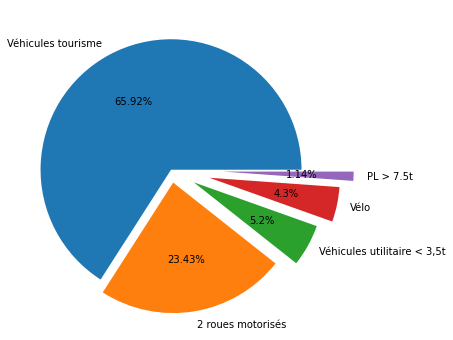

In [8]:
df_new['catv_2r']= df_new['catv'].replace(to_replace = [33,2,30,32,31,5], value = [0,0,0,0,0,0])
df_new

cat_2r = df_new['catv_2r'].value_counts(normalize=True)
plt.figure(figsize=(6,6))

lab = ['Véhicules tourisme', '2 roues motorisés', 'Véhicules utilitaire < 3,5t', 'Vélo', 'PL > 7.5t']
plt.pie(cat_2r, labels= lab, autopct = lambda x: str(round(x,2)) + '%', explode =[0,0.1,0.2,0.3,0.4],);

Ratio avec le nombres de véhicules en circulation par catégorie

Source https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-12/datalab_78_comptes_transports_2019_circulation_novembre2020.pdf

Pour 623 M km-véhicule : Voiture= 485.7, Utilitaires légers= 87.6, PL= 34.9, Deux roues motorisés= 11.3


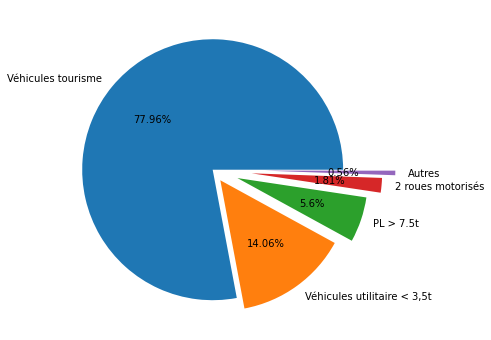

In [10]:
plt.figure(figsize=(6,6))
lab2 = ['Véhicules tourisme', 'Véhicules utilitaire < 3,5t','PL > 7.5t','2 roues motorisés', 'Autres']
plt.pie([485.7,87.6,34.9,11.3,3.5], labels = lab2, autopct = lambda x: str(round(x,2)) + '%', explode =[0,0.1,0.2,0.3,0.4]);

On s'apercoit que les 2 roues représentent 23.43 % des accidents pour seulement 1,81% de km parcourus

### Merge les données

Il ya plusieurs façon de merger les données. Il faut donner des noms différents aux différentes facon.

Le Merge doit ce faire sur la variable Num_Acc.
Notre variable cible doit être grav dans le fichier users.

In [14]:
df_users=pd.read_csv("users.csv")
df_users = df_users.rename(columns=lambda x: x+'_use')
df_users=df_users.rename(columns = {"Num_Acc_use":"Num_Acc"})
df_users=df_users.rename(columns = {"num_veh_use":"num_veh"})

In [15]:
df_places=pd.read_csv("places.csv",low_memory=False)
df_places=df_places.rename(columns=lambda x: x+'_pla')
df_places=df_places.rename(columns = {"Num_Acc_pla":"Num_Acc"})

In [19]:
df_caract=pd.read_csv("caracteristics.csv",encoding='ISO-8859-1',low_memory=False)
df_caract=df_caract.rename(columns=lambda x: x+'_car')
df_caract=df_caract.rename(columns = {"Num_Acc_car":"Num_Acc"})

In [16]:
df_vec=pd.read_csv("vehicles.csv")
df_vec=df_vec.rename(columns=lambda x: x+'_vec')
df_vec=df_vec.rename(columns = {"Num_Acc_vec":"Num_Acc"})
df_vec=df_vec.rename(columns = {"num_veh_vec":"num_veh"})

In [20]:
df_projet_brut=pd.merge(df_users, df_vec, how='left', on=["Num_Acc", "num_veh"])
df_projet_brut=pd.merge(df_projet_brut, df_caract, how='left', on=["Num_Acc"])
df_projet_brut=pd.merge(df_projet_brut, df_places, how='left', on=["Num_Acc"])

Ci-dessous même code qu'au dessus mais qui tourne en 1 fois

In [ ]:
df_users=pd.read_csv("users.csv")
df_users = df_users.rename(columns=lambda x: x+'_use')
df_users=df_users.rename(columns = {"Num_Acc_use":"Num_Acc"})
df_users=df_users.rename(columns = {"num_veh_use":"num_veh"})

df_places=pd.read_csv("places.csv",low_memory=False)
df_places=df_places.rename(columns=lambda x: x+'_pla')
df_places=df_places.rename(columns = {"Num_Acc_pla":"Num_Acc"})

df_caract=pd.read_csv("caracteristics.csv",encoding='ISO-8859-1',low_memory=False)
df_caract=df_caract.rename(columns=lambda x: x+'_car')
df_caract=df_caract.rename(columns = {"Num_Acc_car":"Num_Acc"})

df_vec=pd.read_csv("vehicles.csv")
df_vec=df_vec.rename(columns=lambda x: x+'_vec')
df_vec=df_vec.rename(columns = {"Num_Acc_vec":"Num_Acc"})
df_vec=df_vec.rename(columns = {"num_veh_vec":"num_veh"})

df_projet_brut=pd.merge(df_users, df_vec, how='left', on=["Num_Acc", "num_veh"])
df_projet_brut=pd.merge(df_projet_brut, df_caract, how='left', on=["Num_Acc"])
df_projet_brut=pd.merge(df_projet_brut, df_places, how='left', on=["Num_Acc"])

On nettoie le fichier merge_brut

On supprime les variables gps_car, lat_car et long_car car il y a beaucoup de NaN et pas utile pour la gravité car variable de géolocalisation

On supprime les variables voie_pla, v1_pla et v2_pla car il y a beaucoup de NaN et pas utiles pour la gravité car des variables indiquant des numéros de rue comme la variable adr_car

On supprime les variables pr_pla et pr1_pla car beaucoup de NaN et pas utlies pour la gravité car des variables relative au lieu d'habitation.

On supprime la variable infra_pla car beaucoup de valeurs en 0 (valeurs non indiquées dans les définitions.

In [21]:
# CAC Drop l'ID de l'accident qui n'est pas explicative, les va avec bcp de nan + dummies pour cat string

to_drop=['Num_Acc','gps_car','lat_car','long_car','voie_pla','v1_pla','v2_pla','adr_car','pr_pla','pr1_pla','infra_pla']
df_projet = df_projet_brut.drop(to_drop,axis=1)


# Itération I modélisation


Lien vers les fichiers CSV

https://drive.google.com/drive/folders/1-la4s38zjsvR3-imfW-fTbsflaIH4KPl?usp=sharing

In [2]:
from google.colab import drive
drive.mount('https://drive.google.com/drive/folders/1-la4s38zjsvR3-imfW-fTbsflaIH4KPl?usp=sharing')

ValueError: ignored

In [ ]:
from sklearn import preprocessing

In [23]:
X_num=df_projet.select_dtypes(include=['float64','int64'])

scaler=preprocessing.StandardScaler().fit(X_num) # CAC il ne faut pas

X_num_scaled=pd.DataFrame(scaler.fit_transform(X_num), columns = X_num.columns, index=df_projet.index) # CAC il ne faut pas

In [24]:
X_cat=df_projet.select_dtypes('object')
X_cat=pd.get_dummies(X_cat)

In [25]:
df_nickel=pd.concat([X_num,X_cat], axis=1)

# Attention faudra retraiter mais pour faire tourner le modele on drop les Nan
df_nickel = df_nickel.dropna(axis = 1, how='all')
df_nickel = df_nickel.dropna(axis = 0, how='any')
df_nickel.shape

(38284, 128)

In [26]:
target=df_nickel['grav_use']
# CAC modele simple avec target = [0,1], cat 4 &1 = non grave (0) et 2 &3 grave (1)
target_disc = target.replace([1, 2, 3,4],[0, 1, 1, 0])
target = target_disc


feats=df_nickel.drop(['grav_use'],1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feats, target_disc, test_size=0.20, random_state=42) # teraget_disc

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
# CAC visualiser les faux positifs et negatifs

y_pred = lr.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
score_lr = lr.score(X_test, y_test)

In [31]:
# Classification report pour avoir les differents scores
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.89      0.78      4857
           1       0.63      0.32      0.43      2800

    accuracy                           0.68      7657
   macro avg       0.66      0.61      0.60      7657
weighted avg       0.67      0.68      0.65      7657



In [32]:
probs = lr.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.7,1,0)

from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)


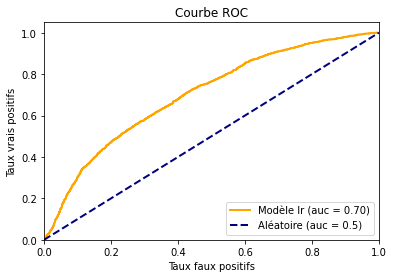

In [33]:
# CAC affichage courbe ROC

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle lr (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();


**CODE HEATMAP**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Index(['place_use', 'catu_use', 'grav_use', 'sexe_use', 'trajet_use',
       'secu_use', 'locp_use', 'actp_use', 'etatp_use', 'an_nais_use',
       'num_veh', 'senc_vec', 'catv_vec', 'occutc_vec', 'obs_vec', 'obsm_vec',
       'choc_vec', 'manv_vec', 'an_car', 'mois_car', 'jour_car', 'hrmn_car',
       'lum_car', 'agg_car', 'int_car', 'atm_car', 'col_car', 'com_car',
       'dep_car', 'catr_pla', 'circ_pla', 'nbv_pla', 'vosp_pla', 'prof_pla',
       'plan_pla', 'lartpc_pla', 'larrout_pla', 'surf_pla', 'situ_pla',
       'env1_pla'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404301 entries, 0 to 404300
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   place_use    367856 non-null  float64
 1   catu_use     404301 non-null  int64  
 2   grav_use     404301 non-null  int64  
 3   sexe_use     404301 non-null  int64  
 4   trajet_use   404239 non-null  float64
 5   secu_use     382364 no

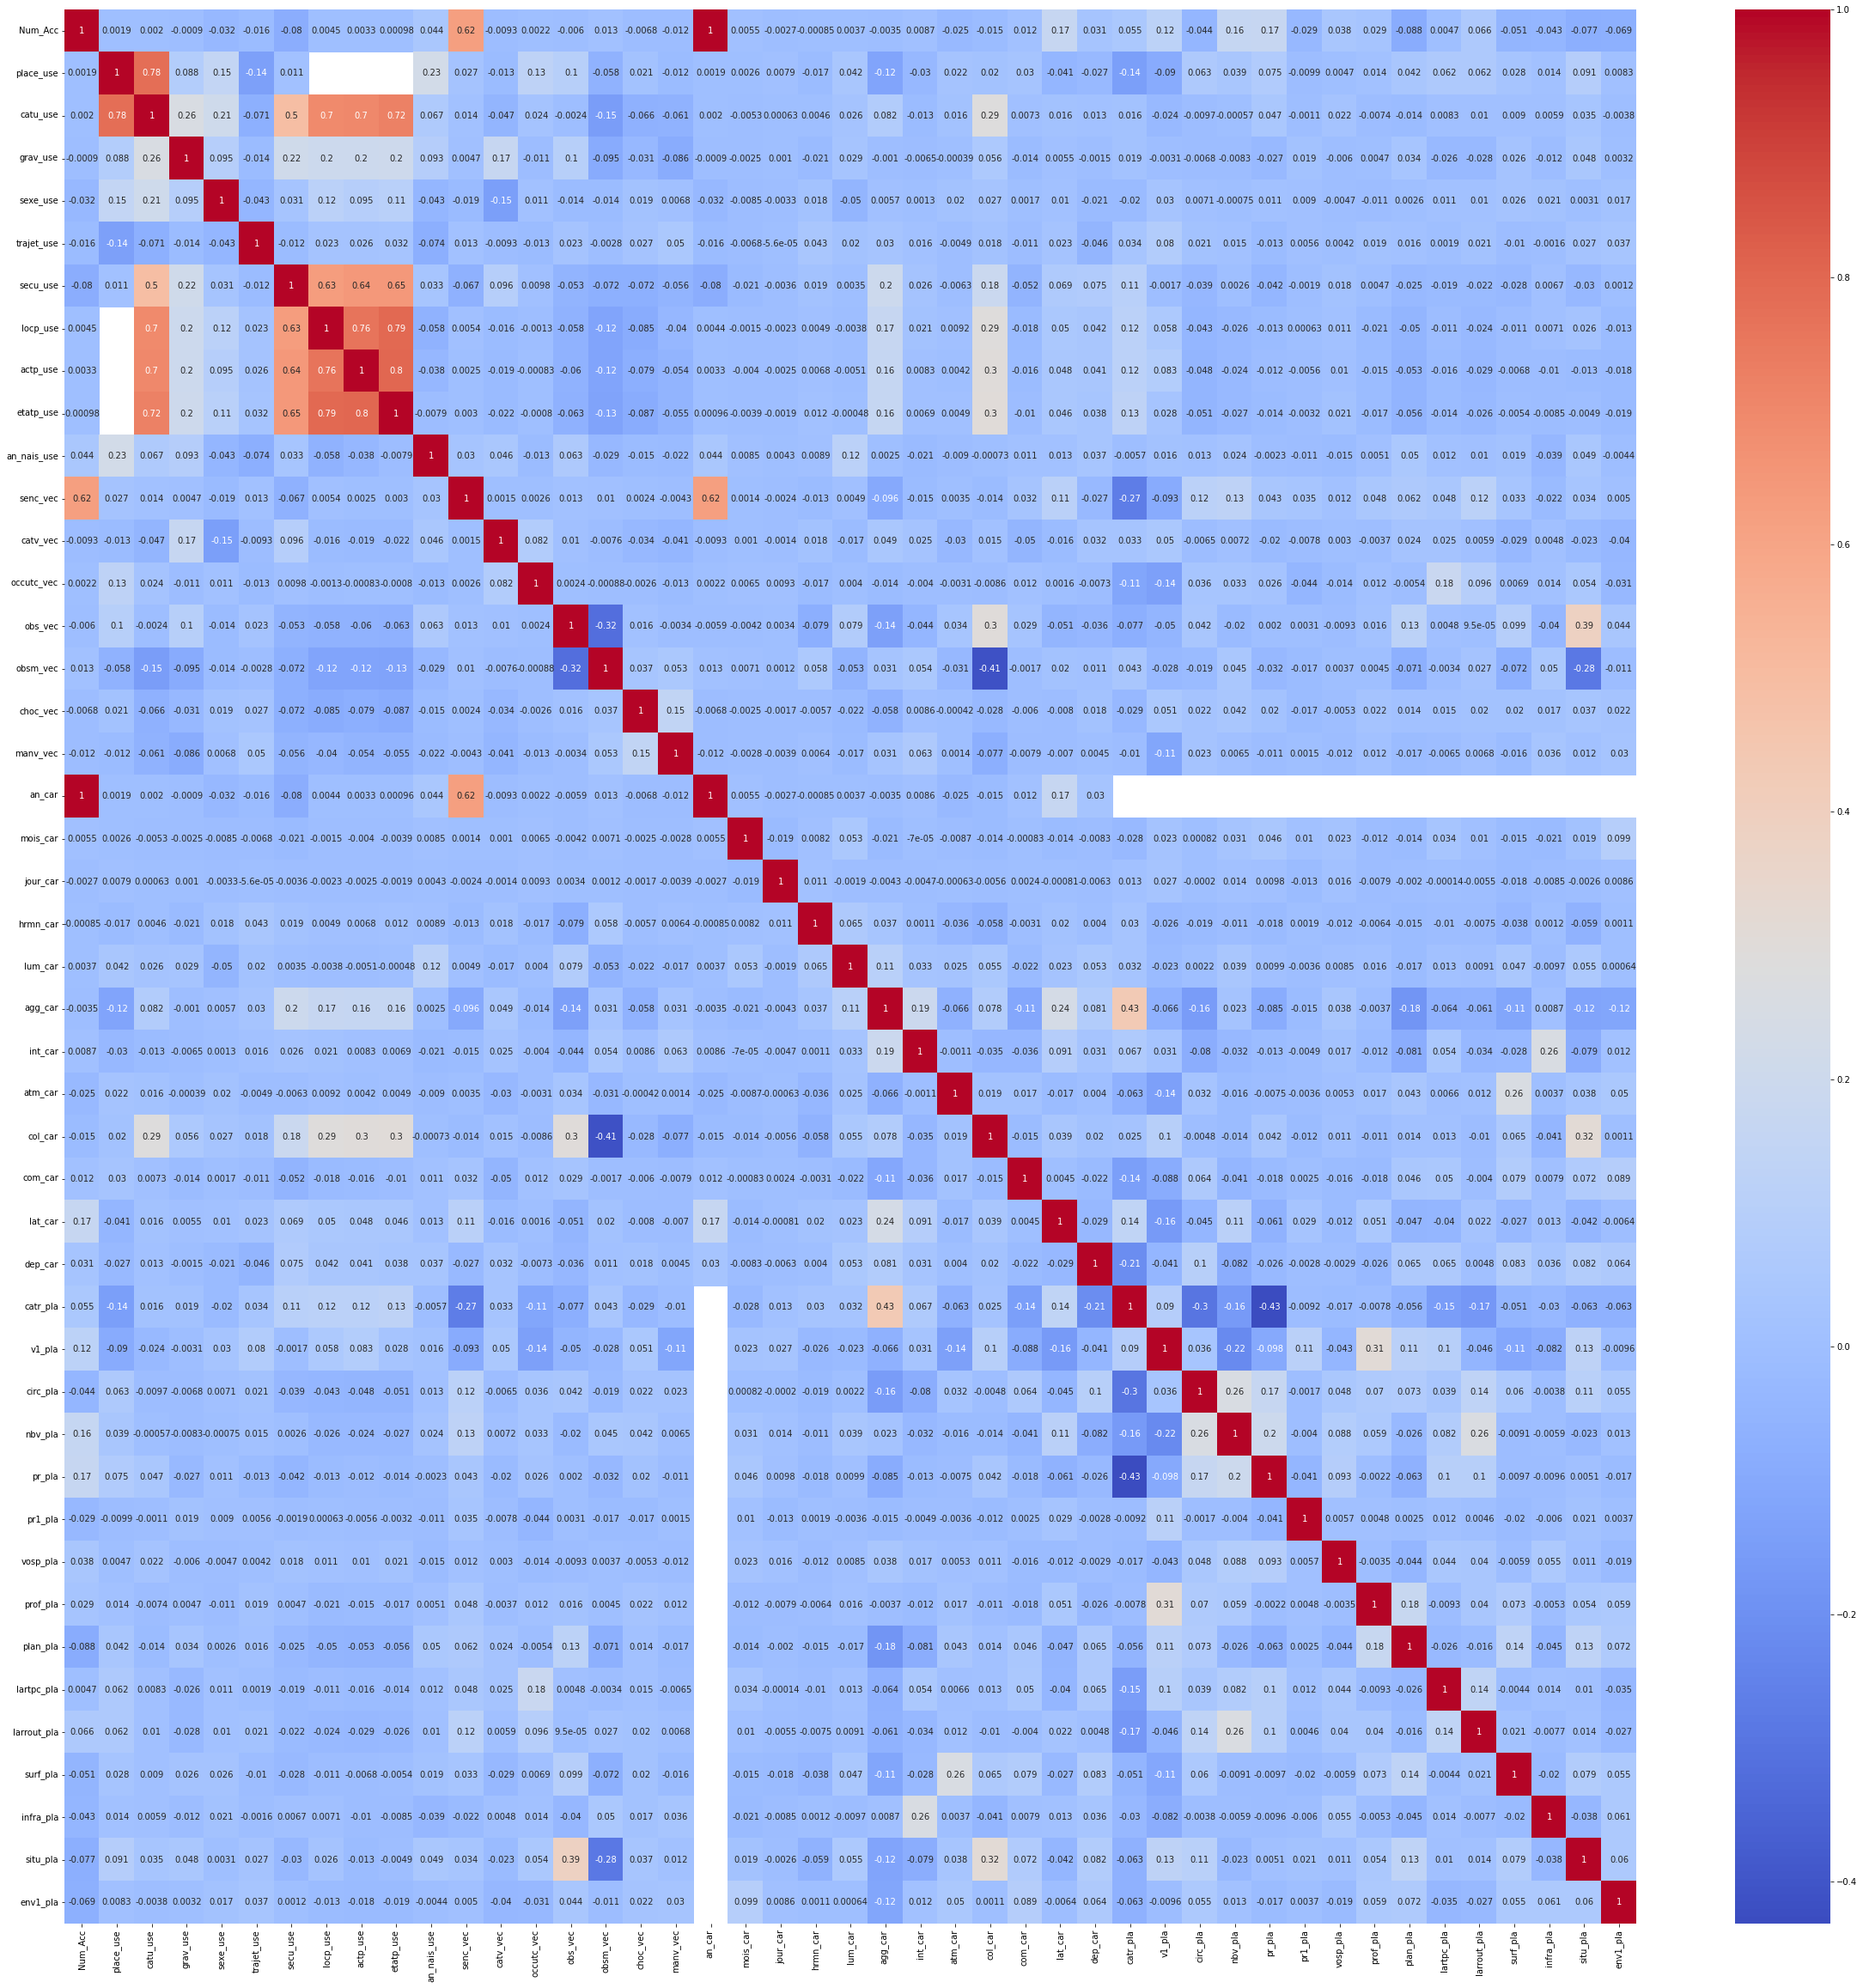

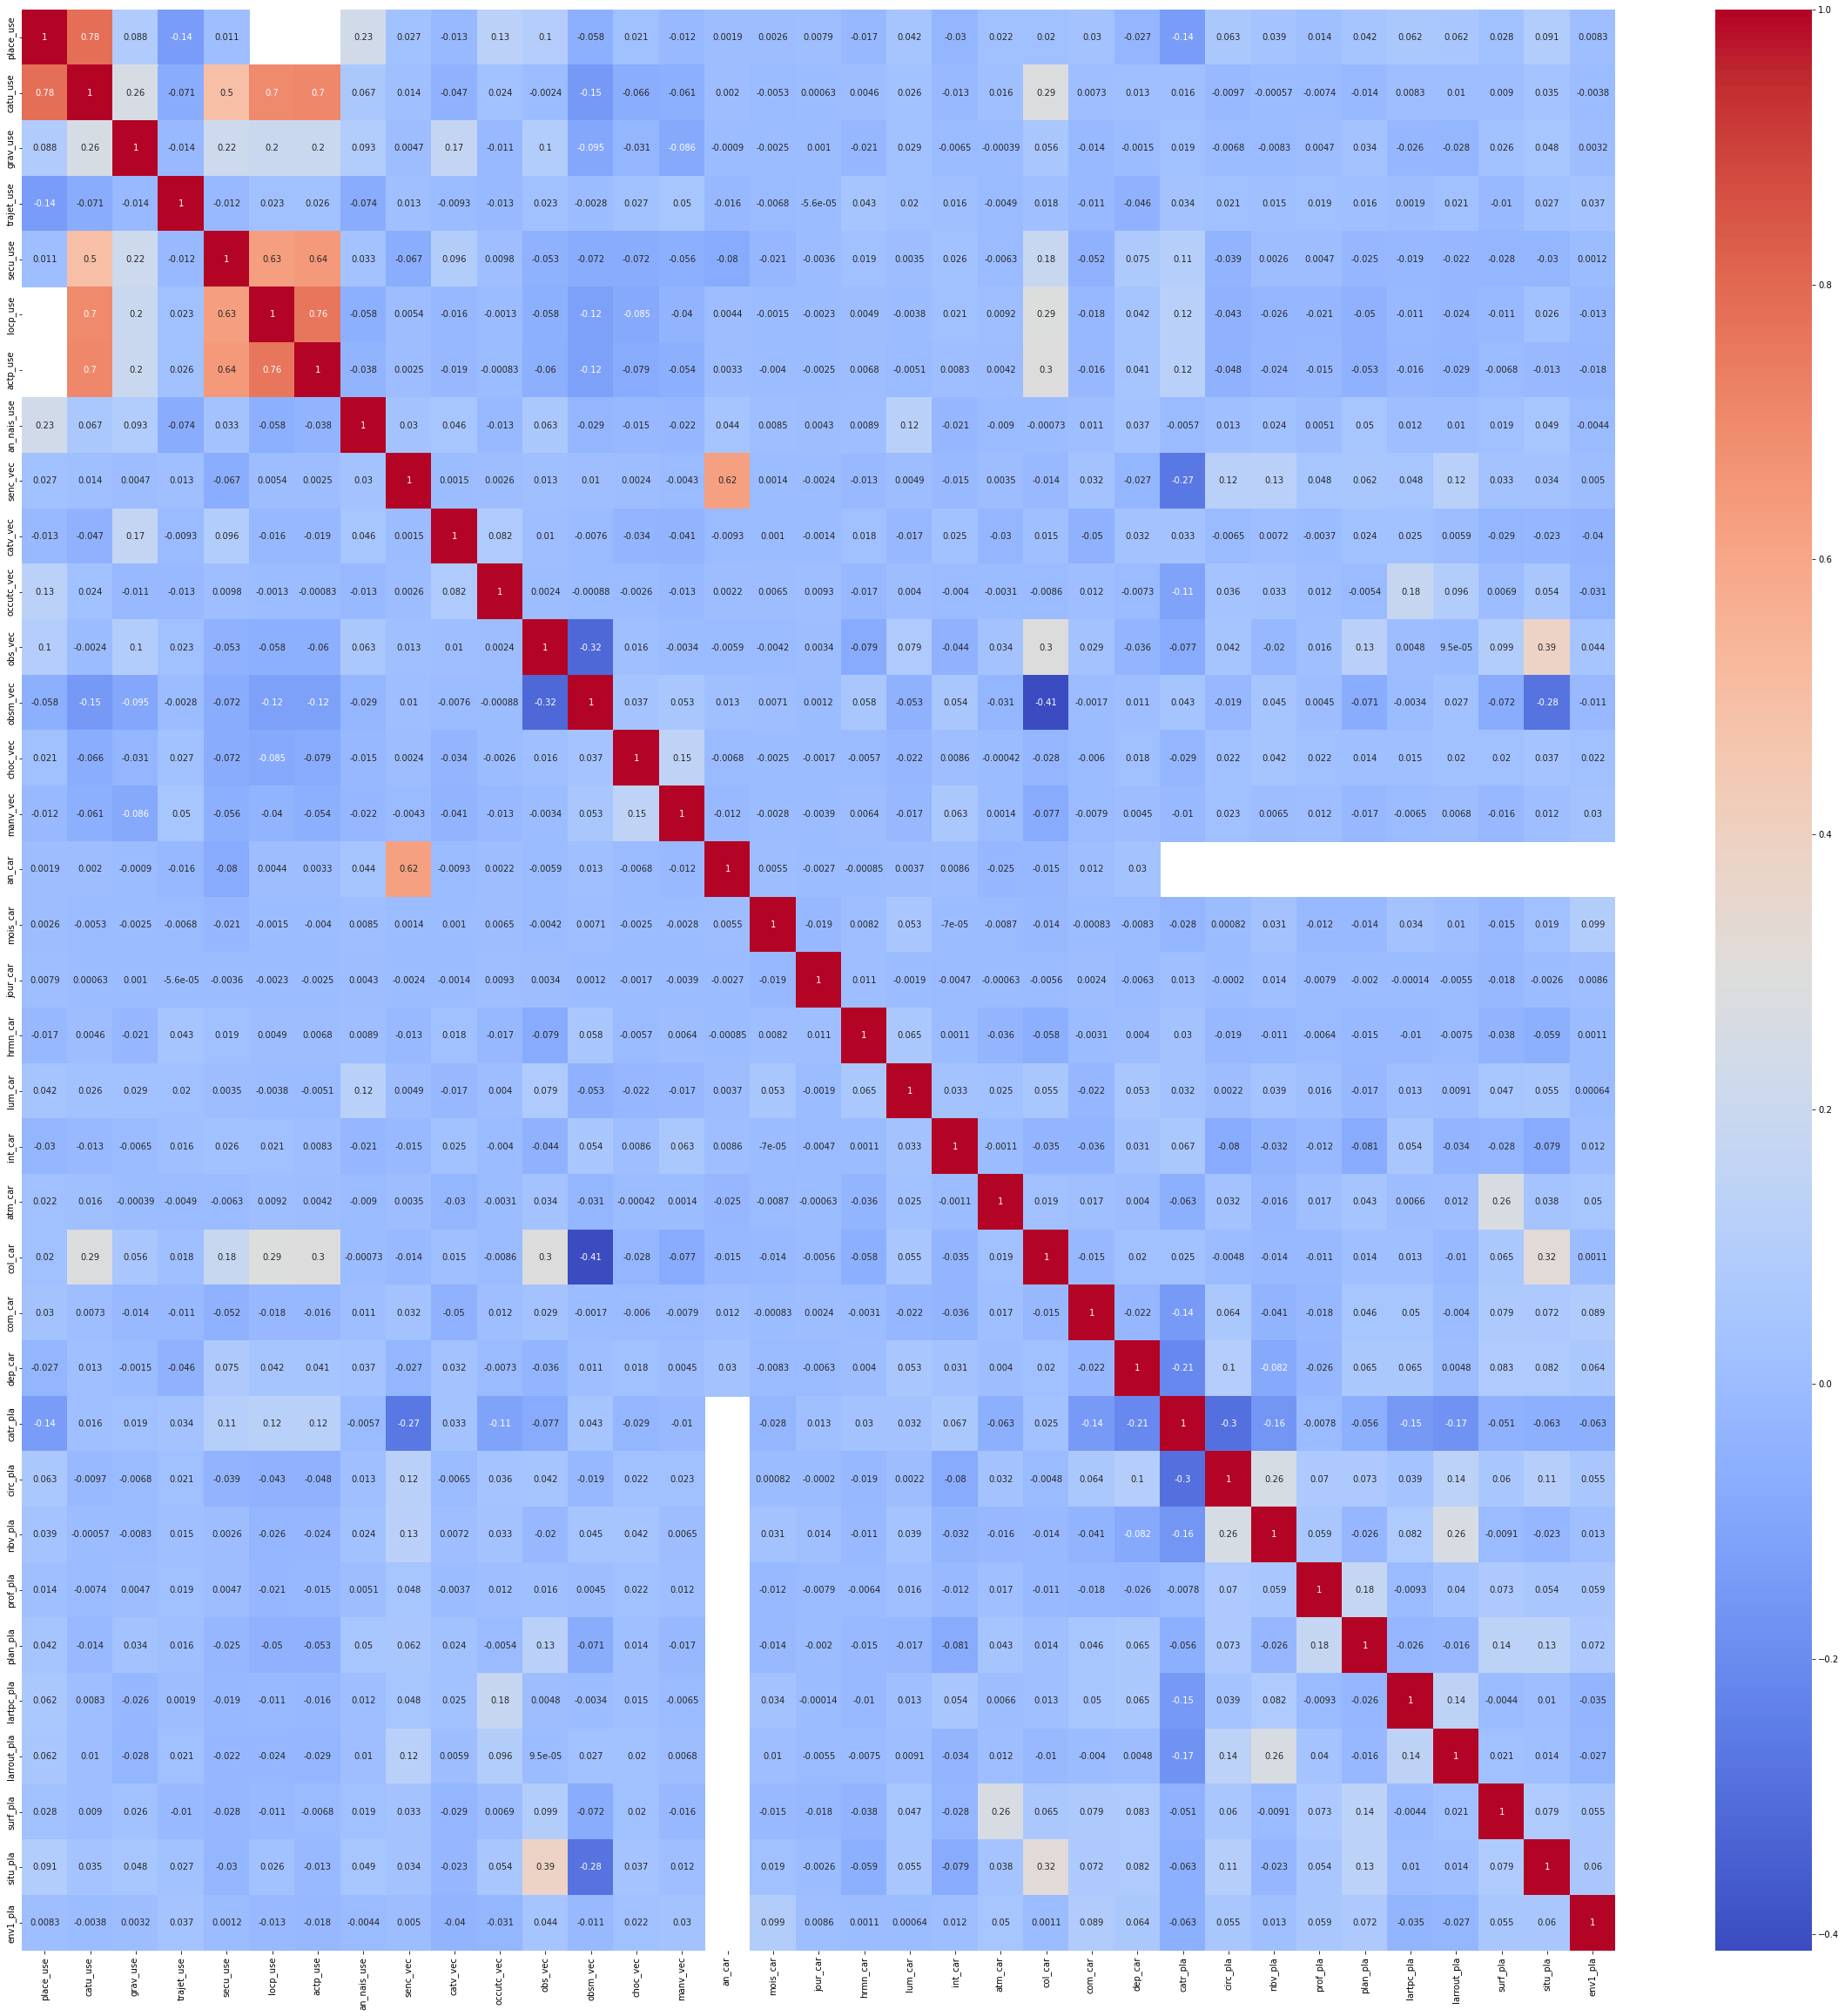

In [34]:
cor = df_projet_brut.corr()

fig, ax = plt.subplots(figsize=(41,41))

sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

##---------------- Feats selection  ---------------------##

from sklearn.feature_selection import VarianceThreshold
print(df_projet.columns)
print(df_projet.info())

df_projet= df_projet.drop('num_veh',axis =1)
sel = VarianceThreshold(threshold=(0.4))
sel.fit(df_projet)

print("Feature selection", sel.get_support())
print()
print("Selected features:", list(df_projet.columns[sel.get_support()]))
print()
print("Removed features:", list(df_projet.columns[~sel.get_support()]))

sel_var = list(df_projet.columns[sel.get_support()])
df_projet_var = df_projet[sel_var]


print("##------- old shape --------##")
print(df_projet.shape)

print()
print("##------- New shape --------##")
print(df_projet_var.shape)


cor_var = df_projet_var.corr()
fig, ax = plt.subplots(figsize=(41,41))
sns.heatmap(cor_var, annot=True, ax=ax, cmap='coolwarm');


**FIN CODE HEATMAP**

 **Test avec RandomForest (Aymeric)**

In [43]:
target = df_nickel['grav_use']
data = df_nickel.drop(['grav_use'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=30)

In [71]:
df_nickel.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38284 entries, 0 to 42267
Columns: 128 entries, place_use to num_veh_Z26
dtypes: float64(28), int64(11), uint8(89)
memory usage: 14.9 MB


In [42]:
# Suppresion des colonnes contenant des NaN pour faire tourner le modèle
df_projet = df_projet.dropna( axis =1, how='any')

In [44]:
clf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=30 )
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=30)

In [45]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['CLasse réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4
CLasse réelle,,,,
1,2409,3,297,174
2,73,9,299,13
3,582,18,1659,250
4,760,3,503,605


In [46]:
clf.score(X_test, y_test)

0.6114666318401463

Importance des 30 premièces variables

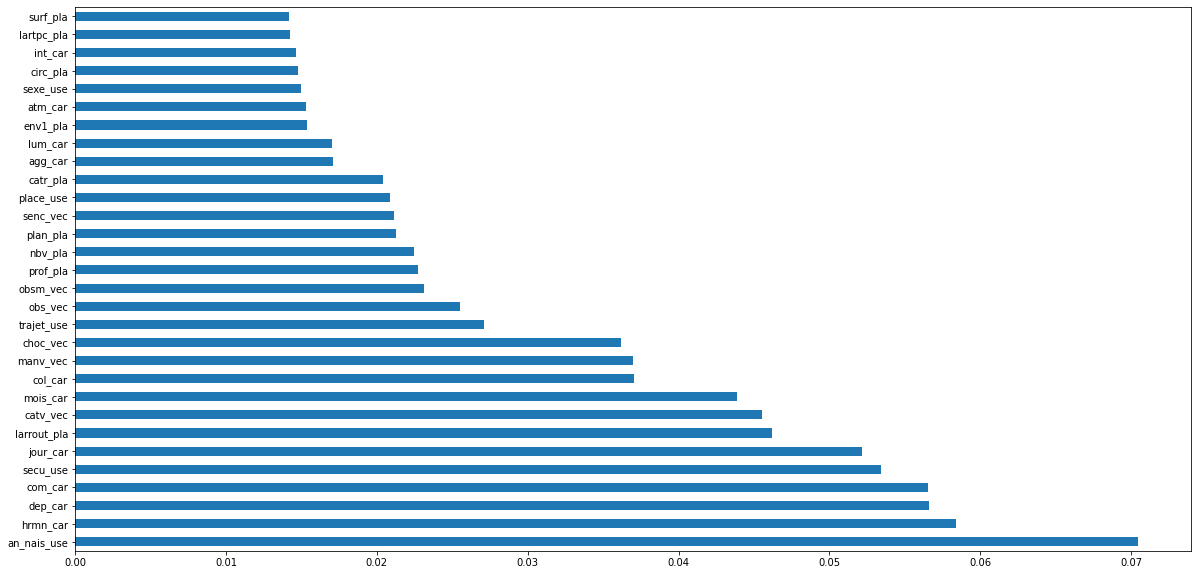

In [47]:
feat_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importance.nlargest(30).plot(kind='barh',figsize= (20,10));

**Test avec XGBoost (Aymeric)**

source : https://www.datacamp.com/tutorial/xgboost-in-python

In [48]:
#Separate the target variable and rest of the variables using .iloc to subset the data.

X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [49]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [50]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.174367


In [53]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=30)

[10:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.450104,0.000002,0.450054,3.771236e-06
1,0.405063,0.000008,0.405074,4.714045e-07
2,0.364679,0.000007,0.364614,1.272792e-05
3,0.328170,0.000012,0.328201,1.461354e-05
4,0.295433,0.000014,0.295448,2.309882e-05


In [55]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.005108
Name: test-rmse-mean, dtype: float64


In [59]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[10:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


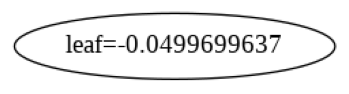

In [57]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [60]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

ValueError: ignored

**Fin XGBoost (Aymeric)**